# Notebook #2: Comparing GC content across three species:
# 1. Human
# 2. Mouse (Mus musculus)
# 3. Blue whale (Balaenoptera musculus)

# Part I: Load in the data

In [73]:
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

python(58743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [61]:
#Load in the genomes:
Whole_Genome_Human = pickle.load(open("output_whole_genome_2.p", "rb"))
CDS_Genome_Human = pickle.load(open("output_coding_genome_2.p", "rb"))

Whole_Genome_Whale = pickle.load(open("output_whole_genome_whale.p", "rb"))
CDS_Genome_Whale = pickle.load(open("output_coding_genome_2_whale.p", "rb"))

Whole_Genome_Mouse = pickle.load(open("output_whole_genome_mouse.p", "rb"))
CDS_Genome_Mouse = pickle.load(open("output_coding_genome_2_mouse.p", "rb"))

# Part II: Create DataFrames from our dictionaries:

In [62]:
# Whole Genome:
WholeHuman_df = pd.DataFrame(Whole_Genome_Human)
WholeWhale_df = pd.DataFrame(Whole_Genome_Whale)
WholeMouse_df = pd.DataFrame(Whole_Genome_Mouse)

# Coding Genome:
CodHuman_df = pd.DataFrame(CDS_Genome_Human)
CodWhale_df = pd.DataFrame(CDS_Genome_Whale)
CodMouse_df = pd.DataFrame(CDS_Genome_Mouse)

In [63]:
## Transpose from wide to long: 
WholeHuman_df_Long = WholeHuman_df.transpose()
WholeWhale_df_Long = WholeWhale_df.transpose()
WholeMouse_df_Long = WholeMouse_df.transpose()

CodHuman_df_Long = CodHuman_df.transpose()
CodWhale_df_Long = CodWhale_df.transpose()
CodMouse_df_Long = CodMouse_df.transpose()

# Part III: Order the values based on chromosome #

In [64]:
custom_order = [str(i) for i in range(1, 23)] + ['X', 'Y']

In [65]:
# Reset the index and create a new column
WholeHuman_df_Long.reset_index(inplace=True)
WholeWhale_df_Long.reset_index(inplace=True)
WholeMouse_df_Long.reset_index(inplace=True)
CodHuman_df_Long.reset_index(inplace=True)
CodWhale_df_Long.reset_index(inplace=True)
CodMouse_df_Long.reset_index(inplace=True)

In [66]:
# Now, rename the new first column (which was the index)
WholeHuman_df_Long.rename(columns={'index': 'Chromosome'}, inplace=True)
WholeWhale_df_Long.rename(columns={'index': 'Chromosome'}, inplace=True)
WholeMouse_df_Long.rename(columns={'index': 'Chromosome'}, inplace=True)
CodHuman_df_Long.rename(columns={'index': 'Chromosome'}, inplace=True)
CodWhale_df_Long.rename(columns={'index': 'Chromosome'}, inplace=True)
CodMouse_df_Long.rename(columns={'index': 'Chromosome'}, inplace=True)

# Part IV: Sort the DataFrames by chromosome

# Make new column name

In [67]:
WholeHuman_df_Long['Chromosome'] = pd.Categorical(WholeHuman_df_Long['Chromosome'], categories=custom_order, ordered=True)
WholeWhale_df_Long['Chromosome'] = pd.Categorical(WholeWhale_df_Long['Chromosome'], categories=custom_order, ordered=True)
WholeMouse_df_Long['Chromosome'] = pd.Categorical(WholeMouse_df_Long['Chromosome'], categories=custom_order, ordered=True)
CodHuman_df_Long['Chromosome'] = pd.Categorical(CodHuman_df_Long['Chromosome'], categories=custom_order, ordered=True)
CodWhale_df_Long['Chromosome'] = pd.Categorical(CodWhale_df_Long['Chromosome'], categories=custom_order, ordered=True)
CodMouse_df_Long['Chromosome'] = pd.Categorical(CodMouse_df_Long['Chromosome'], categories=custom_order, ordered=True)

# Sort by chromosome

In [68]:
# Sort the DataFrame by the categorical column
WholeHuman_df_Long_Sorted = WholeHuman_df_Long.sort_values('Chromosome')
WholeWhale_df_Long_Sorted = WholeWhale_df_Long.sort_values('Chromosome')
WholeMouse_df_Long_Sorted = WholeMouse_df_Long.sort_values('Chromosome')

CodHuman_df_Long_Sorted = CodHuman_df_Long.sort_values('Chromosome')
CodWhale_df_Long_Sorted = CodWhale_df_Long.sort_values('Chromosome')
CodMouse_df_Long_Sorted = CodMouse_df_Long.sort_values('Chromosome')

In [69]:
## Example of the final, sorted dataframes:
WholeMouse_df_Long_Sorted

,Chromosome,length_all,length_non,GC_count,GC_content_all,GC_content_non
0,1,195154279.0,191954033.0,78981540.0,0.404713,0.411461
11,2,181755017.0,178354017.0,75058694.0,0.412966,0.420841
12,3,159745316.0,156538176.0,63322388.0,0.396396,0.404517
13,4,156860686.0,152709788.0,64572955.0,0.411658,0.422848
14,5,151758149.0,148006149.0,62954932.0,0.414837,0.425353
15,6,149588044.0,146383041.0,60627727.0,0.405298,0.414172
16,7,144995196.0,141674695.0,61008888.0,0.420765,0.430627
17,8,130127694.0,125677394.0,53250005.0,0.409213,0.423704
18,9,124359700.0,121184854.0,51753224.0,0.416158,0.427060
1,10,130530862.0,127155760.0,52647376.0,0.403333,0.414038


# Part V: Calculate the average GC content across all chromosomes

In [70]:
#Create the average values
#HUMAN
WholeHuman_df_Long_Sorted_All_Mean = WholeHuman_df_Long_Sorted['GC_content_all'].mean()
WholeHuman_df_Long_Sorted_NoN_Mean = WholeHuman_df_Long_Sorted['GC_content_non'].mean()
CodHuman_df_Long_Sorted_All_Mean = CodHuman_df_Long_Sorted['GC_content_all'].mean()
CodHuman_df_Long_Sorted_NoN_Mean = CodHuman_df_Long_Sorted['GC_content_non'].mean()

#WHALE
WholeWhale_df_Long_Sorted_All_Mean = WholeWhale_df_Long_Sorted['GC_content_all'].mean()
WholeWhale_df_Long_Sorted_NoN_Mean = WholeWhale_df_Long_Sorted['GC_content_non'].mean()
CodWhale_df_Long_Sorted_All_Mean = CodWhale_df_Long_Sorted['GC_content_all'].mean()
CodWhale_df_Long_Sorted_NoN_Mean = CodWhale_df_Long_Sorted['GC_content_non'].mean()

#MOUSE
WholeMouse_df_Long_Sorted_All_Mean = WholeMouse_df_Long_Sorted['GC_content_all'].mean()
WholeMouse_df_Long_Sorted_NoN_Mean = WholeMouse_df_Long_Sorted['GC_content_non'].mean()
CodMouse_df_Long_Sorted_All_Mean = CodMouse_df_Long_Sorted['GC_content_all'].mean()
CodMouse_df_Long_Sorted_NoN_Mean = CodMouse_df_Long_Sorted['GC_content_non'].mean()

In [71]:
WholeHuman_df_Long_Sorted_All_Mean

np.float64(0.38484139537691947)

# Part VI: Visually compare GC content in the whole genome across species

# Make panel graphs

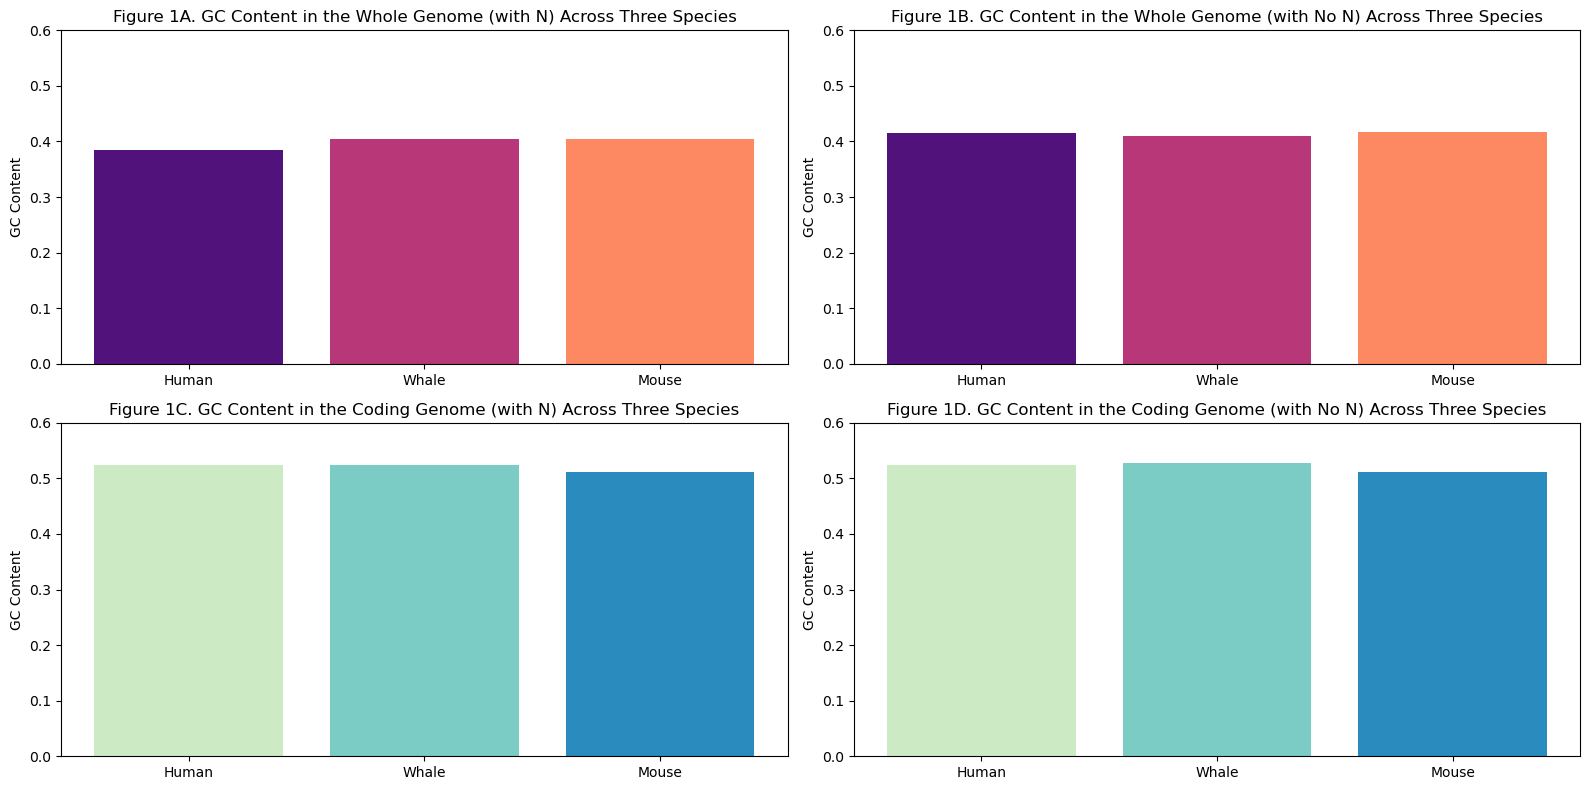

In [72]:
# Create a figure
#fig, ax = plt.subplots(figsize=(5, 5))

# Bar width:
bar_width = 0.5

# Data to be used:
x = ['Human', 'Whale', 'Mouse'] ##Categories
# Average bar heights (defined above):
average_values_all = [WholeHuman_df_Long_Sorted_All_Mean, WholeWhale_df_Long_Sorted_All_Mean, WholeMouse_df_Long_Sorted_All_Mean]
average_values_NoN = [WholeHuman_df_Long_Sorted_NoN_Mean, WholeWhale_df_Long_Sorted_NoN_Mean, WholeMouse_df_Long_Sorted_NoN_Mean]
cod_average_all = [CodHuman_df_Long_Sorted_All_Mean, CodHuman_df_Long_Sorted_All_Mean, CodMouse_df_Long_Sorted_All_Mean]
cod_average_NoN = [CodHuman_df_Long_Sorted_NoN_Mean, CodWhale_df_Long_Sorted_NoN_Mean, CodMouse_df_Long_Sorted_NoN_Mean]

# Create the figure with a specified size:
fig, axes = plt.subplots(2, 2, figsize=(16,8))  # Adjust width and height as needed

# Use Seaborn to create a color palette:
palette1 = sns.color_palette("magma", n_colors=len(average_values))
palette2 = sns.color_palette("GnBu", n_colors=len(average_values))
#Create the bar graphs separately:

axes[0,0].bar(x, average_values_all, color = palette1)
axes[0,0].set_title("Figure 1A. GC Content in the Whole Genome (with N) Across Three Species")
axes[0,0].set_ylabel('GC Content')
axes[0,0].set_ylim(0, 0.6)

axes[0,1].bar(x, average_values_NoN, color = palette1)
axes[0,1].set_title("Figure 1B. GC Content in the Whole Genome (with No N) Across Three Species")
axes[0,1].set_ylabel('GC Content')
axes[0,1].set_ylim(0, 0.6)

axes[1,0].bar(x, cod_average_all, color = palette2)
axes[1,0].set_title("Figure 1C. GC Content in the Coding Genome (with N) Across Three Species")
axes[1,0].set_ylabel('GC Content')
axes[1,0].set_ylim(0, 0.6)

axes[1,1].bar(x, cod_average_NoN, color = palette2)
axes[1,1].set_title("Figure 1D. GC Content in the Coding Genome (with No N) Across Three Species")
axes[1,1].set_ylabel('GC Content')
axes[1,1].set_ylim(0, 0.6)


# Show the plot:
plt.tight_layout()
plt.show()

# Next steps:
# 1. Statistical comparisons across species
# 2. Add error bars to the graphs
# 3. Exlpore amino acid content across species